#### Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. 

![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access a file which was made using the standard [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine. We also need some tools to access and manipulate this file:-

- [ ] UpRoot (https://uproot.readthedocs.io/en/latest/)
- [ ] Awkward (https://pypi.org/project/awkward/)
- [ ] wget (https://pypi.org/project/wget/)
- [ ] matplotlib for plotting!
- [ ] Scipy for fitting (https://scipy.org/)

In [1]:
# installing important packages
%pip install uproot awkward wget matplotlib scipy
from scipy.optimize import curve_fit


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# notice, we got a warning that these files were installed in a weird location (since packages is not writable)
# let's fix it! We just add the directory it installed them to, to the place Python looks for packages. Simples.

!PATH=/home/jovyan/.local/bin$PATH
!echo $PATH

/usr/local/bin:/Users/mckenziepedro/Library/Python/3.12/bin:/opt/anaconda3/bin:/opt/anaconda3/condabin:/usr/local/bin:/Library/Frameworks/Python.framework/Versions/3.12/bin:/opt/homebrew/bin:/opt/homebrew/sbin:/Library/Frameworks/Python.framework/Versions/3.12/bin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/usr/local/sbin:/Library/Apple/usr/bin:/opt/anaconda3/bin:/opt/anaconda3/condabin:/usr/local/bin:/Library/Frameworks/Python.framework/Versions/3.12/bin:/opt/homebrew/bin:/opt/homebrew/sbin:/Library/Frameworks/Python.framework/Versions/3.12/bin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/usr/local/sbin:/Library/Apple/usr/bin


In [3]:
import awkward,uproot

All being well - this should give no errors.... do not try to proceed if you get errors in the above cell.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/21975/files/4933459/download?download_frd=1

Then upload it directly. You can also run the following:

In [4]:
# new directory with data file 
!mkdir LHCb_Data && mv B2HHH_MagnetDown.root ./LHCb_Data/B2HHH_MagnetDown.root


mkdir: LHCb_Data: File exists


In [5]:
# since we need to use Uproot to load our file and awkward to handle it, we must first import this into Python:
# we already did this above, it does not hurt to do it again, and if you make a new notebook in future remember this step
import uproot, awkward, numpy as np

# then we open the ROOT file using the open command. - note you need to make this file path correct for your own setup!
f = uproot.open ("LHCb_Data/B2HHH_MagnetDown.root")

# from our file, we have to extract the DecayTree
f.keys()

['DecayTree;1']

In [6]:
# it tells us there is one key, it's called DecayTree. Let's look inside:
f["DecayTree"].show()

# you can also use keys() again to see them all...
f["DecayTree"].keys()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

In [7]:
# now it shows us all the variables inside, their type and so on
# let's load one (The x-momentum of Hadron 1) 'H1_PX' variable in an awkward array:
data=f["DecayTree/H1_PX"].array()


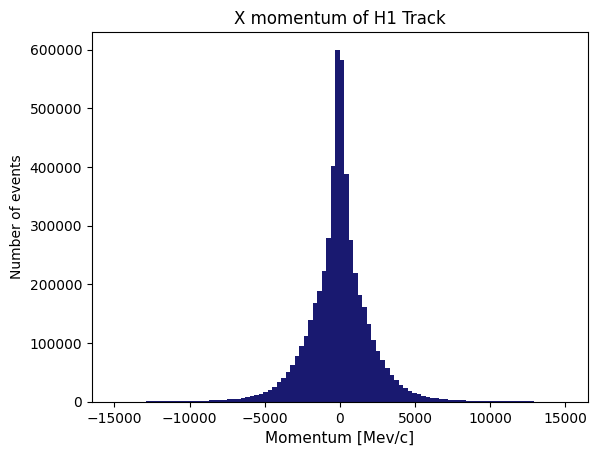

In [9]:
# lets plot something!
import matplotlib.pylab as plt

# make a place to plot something
plt.figure()
plt.hist (data, bins=100, range=(-15000,15000), color='midnightblue')
plt.xlabel('Momentum [Mev/c]', fontsize=11)
plt.ylabel('Number of events')
plt.title('X momentum of H1 Track');


# My comments:

In this section we plotted a distribution of the x momentum of H1, also known as the first daughter particle (of the three Hadron Daughters), using 100 bins. These daughter particles come from the B meson decay. 

-----------------------------------------------------------------------

# Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce many things. In this analysis we are interested in events that take place when we have either particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are ~524~ 630 [documented](https://pdg.lbl.gov/2022/listings/rpp2022-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon, Muon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions. As we know there is a H2 and H3 referring to the 2nd and 3rd daughters in this decay.

Let's get started with working with this data:

<font color="red"> <ins> If you got here before Chris did the general introduction - please *STOP* take a coffee and then let's go ahead when everyone is together and back in the room </ins> </font>

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable...perhaps called H1_Ptot?

[5.18e+04, 3.26e+05, 9.08e+04, 8.69e+04, ..., 3.73e+04, 3.59e+04, 5.21e+03]


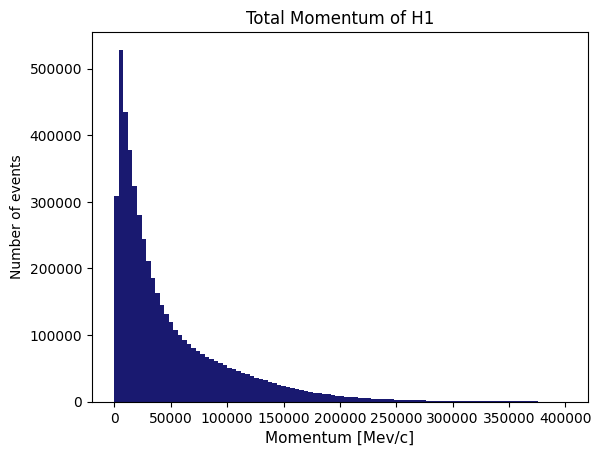

In [11]:
# here make a plot of the Total momentum of each of the three daughters
# first is to access the data from the Decay tree and either load one array per variable or a large array with each variable as another column
Events=f['DecayTree']
H1_PX=Events['H1_PX'].array()
H1_PY=Events['H1_PY'].array()
H1_PZ=Events['H1_PZ'].array()

# once the data is extracted you will need to do some mathematics to calculate total momentum from the three components
H1_Ptot = np.sqrt(((H1_PX)**2)+((H1_PY)**2)+((H1_PZ)**2))
print(H1_Ptot)

# then here you can plot something (remember to adjust the range)
plt.figure()
plt.hist (H1_Ptot, bins=100, range=(0,400000), color='midnightblue');
plt.xlabel('Momentum [Mev/c]', fontsize=11)
plt.ylabel('Number of events')
plt.title('Total Momentum of H1');


In the end we do not really care about the kinetics of the daughters, our main interest is in the B-Meson. So we make the assumption that these three particles come from the same Mother, we can calculate what momentum she must have had (since momentum is conserved). So we now want to calculate and then plot the total momentum for the mother (M_Ptot).

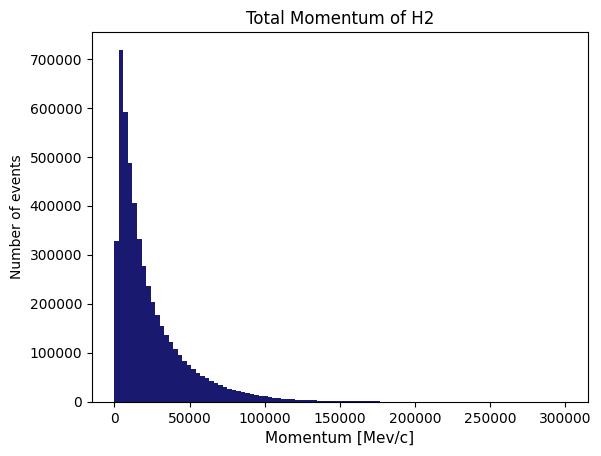

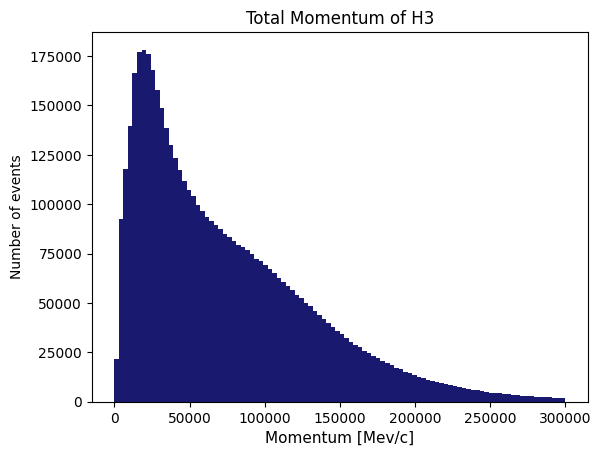

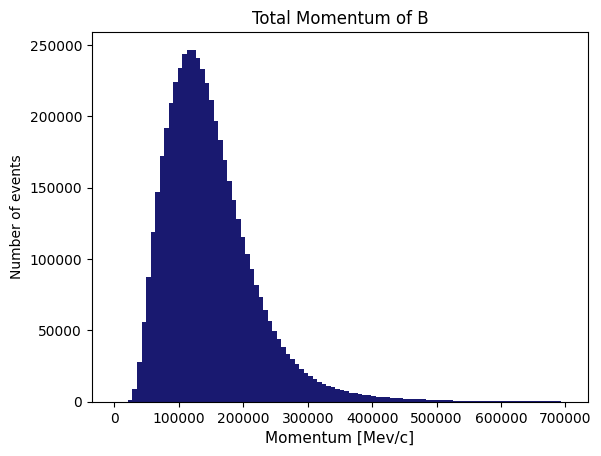

In [13]:
Events=f['DecayTree']

# calculating total moment for the second daughter 
H2_PX=Events['H2_PX'].array()
H2_PY=Events['H2_PY'].array()
H2_PZ=Events['H2_PZ'].array()
H2_Ptot = np.sqrt(((H2_PX)**2)+((H2_PY)**2)+((H2_PZ)**2))

# calculating total moment for the third daughter 
H3_PX=Events['H3_PX'].array()
H3_PY=Events['H3_PY'].array()
H3_PZ=Events['H3_PZ'].array()
H3_Ptot = np.sqrt(((H3_PX)**2)+((H3_PY)**2)+((H3_PZ)**2))

# plotting the total momentum of both daughters
plt.figure();
plt.hist (H2_Ptot, bins=100, range=(0,300000), color='midnightblue')
plt.xlabel('Momentum [Mev/c]', fontsize=11)
plt.ylabel('Number of events')
plt.title('Total Momentum of H2')
plt.figure();
plt.hist (H3_Ptot, bins=100, range=(0,300000), color='midnightblue')
plt.xlabel('Momentum [Mev/c]', fontsize=11)
plt.ylabel('Number of events')
plt.title('Total Momentum of H3')

# plotting the momentum of the mother (b meson)
B_Ptot= np.sqrt(((H1_PX+H2_PX+H3_PX)**2)+((H1_PY+H2_PY+H3_PY)**2)+((H1_PZ+H2_PZ+H3_PZ)**2))
plt.figure();
plt.hist (B_Ptot, bins=100, range=(0,700000), color='midnightblue');
plt.xlabel('Momentum [Mev/c]', fontsize=11)
plt.ylabel('Number of events')
plt.title('Total Momentum of B');

# My comments:

In this section we computed the total momentum of each of the three daughters, and then used the components of each to compute the total momentum for the B meson. This momentum was computed by the formula:

The total momentum is:
$p_{\mathrm{tot}} = \sqrt{p_x^2 + p_y^2 + p_z^2}$.


Each daughters momentum told us a bit more about how the energy of the B meson is distributed amongst the daughters - of which the third daughter had the most. Because momentum is conserved, ideally the B meson's momentum would just be the sum of the momentum of its decay products.

---------------------------------------------------------------------

So we are cracking along with looking at the kinematics of our decay. What might also be handy is a way to dump our all our data from a given entry in one output:

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [14]:
# lets load the data in a slightly different way:
# lets take our decay tree and just make it an array with a header which is the name of the variable
branches=Events.arrays()

# figure out how to convert to the python 'list' format and use it there
branches_dictionary=branches.tolist()

# now we just make some pretty printing and loop over all items in the dictionary relating to one particular entry (e.g. number 45)
print ("Event number #45")
print ("-------------------")
for branch, value in branches_dictionary[45].items():
    print(f"{branch} : {value}") 

Event number #45
-------------------
B_FlightDistance : 257.00205776946603
B_VertexChi2 : 1.865567179221614
H1_PX : 420.3413896413646
H1_PY : -110.66276079201207
H1_PZ : 5883.766388082404
H1_ProbK : 0.012183159589767456
H1_ProbPi : 0.8191394209861755
H1_Charge : -1
H1_IPChi2 : 27121.53690741779
H1_isMuon : 1
H2_PX : -985.6367588987478
H2_PY : 630.9893539299605
H2_PZ : 35342.13861801284
H2_ProbK : 0.6670113801956177
H2_ProbPi : 0.04563945531845093
H2_Charge : 1
H2_IPChi2 : 13712.438218214942
H2_isMuon : 0
H3_PX : -6242.300384410311
H3_PY : -862.2130979651508
H3_PZ : 277275.49225626234
H3_ProbK : 0.07501816749572754
H3_ProbPi : 0.428352952003479
H3_Charge : 1
H3_IPChi2 : 1026.12298434195
H3_isMuon : 0


Our next task is to the find the Energy of each of the Kaons. We need to do this in a relativistically correct manner - so recalling that E<sup>2</sup>=p<sup>2</sup>+m<sup>2</sup> and by looking up the mass of the Kaon - you can find the Energy for the three Kaons.

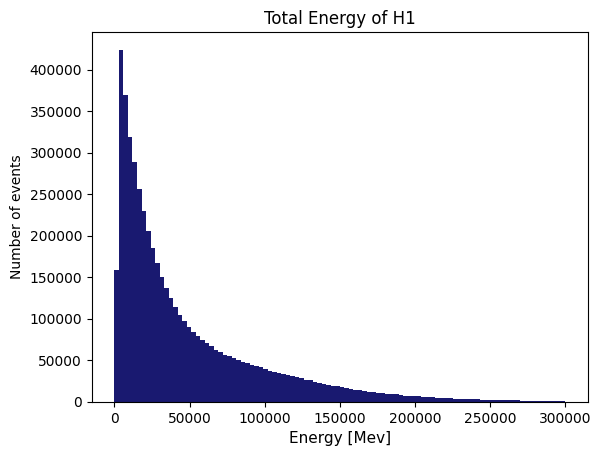

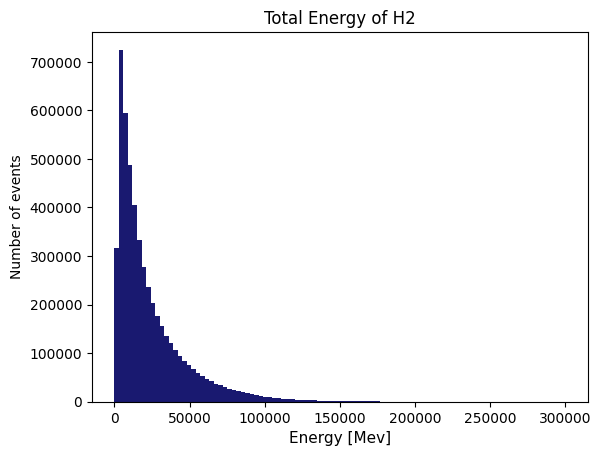

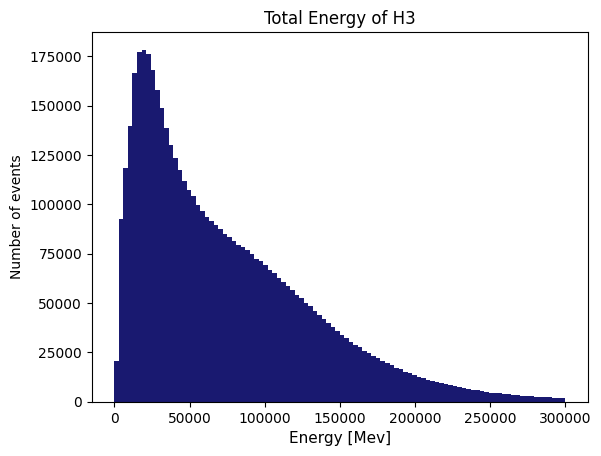

In [15]:
mass_kaon = 493.7

def energy(momentum,mass):
    return np.sqrt((momentum)**2+(mass)**2)

E_H1 = energy(H1_Ptot, mass_kaon)
E_H2 = energy(H2_Ptot, mass_kaon)
E_H3 = energy(H3_Ptot, mass_kaon)

plt.figure();
plt.hist (E_H1, bins=100, range=(0,300000), color='midnightblue');
plt.xlabel('Energy [Mev]', fontsize=11);
plt.ylabel('Number of events');
plt.title('Total Energy of H1');
plt.figure();
plt.hist (E_H2, bins=100, range=(0,300000), color='midnightblue');
plt.xlabel('Energy [Mev]', fontsize=11);
plt.ylabel('Number of events');
plt.title('Total Energy of H2');
plt.figure();
plt.hist (E_H3, bins=100, range=(0,300000), color='midnightblue');
plt.xlabel('Energy [Mev]', fontsize=11);
plt.ylabel('Number of events');
plt.title('Total Energy of H3');


# My comments: 

The mass of the kaon was found at: https://en.wikipedia.org/wiki/Kaon

In this section we assumed the mass of each daughter track to be that of the kaon. Using the relativistic energy formula:

$E= \sqrt{p^2 + m^2}$.

we could compute the total energy using the kaons mass and the respective total momentum of each track. 

---------------------------------------------------------------------


We have now completed the initial steps and begun to work through what we need to with the data. This is a(nother) perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energies of the particles we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

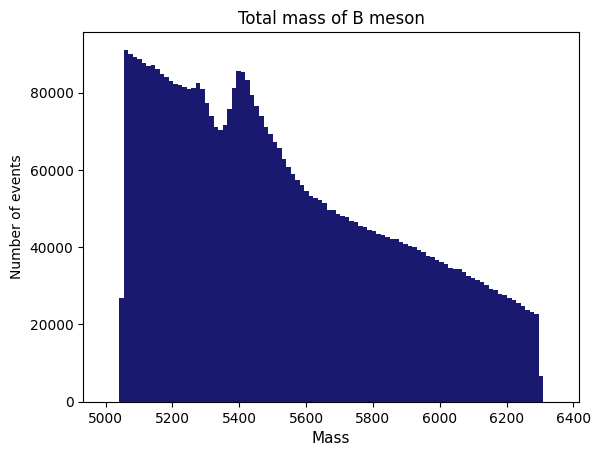

In [16]:
# energy and momentum is conserved so we can find the quantities for B from her daughters
B_Etot = E_H1 + E_H2 + E_H3
B_m = np.sqrt((B_Etot**2)-(B_Ptot**2))

# now plot a histogram of the range of masses of the B meson
plt.figure();
plt.hist (B_m, bins=100, range=(5000,6350), color ='midnightblue');
plt.xlabel('Mass', fontsize=11);
plt.ylabel('Number of events');
plt.title('Total mass of B meson');

# does this match what we would expect from theory?
# yes! peak at known mass value
#Hint - look it up

# My comments 

In this section we combine the energies of the different tracks, to reconstruct the mass of the mother, the B meson. Since energy and momentum are conserved we could sum the energies of the daughters to arrive at that of the mother. We have the energy and momentum so we can calculate mass per the formula:

$m_{\mathrm{B}} = \sqrt{E_{\mathrm{B}}^2 + P_{\mathrm{B}}^2}$.

If the measurements were perfect, we would expect a spike at 5279 Mev/c<sup>2</sup> (the known B meson mass), but in reality there is a broader spread. We also notice two distinct peaks in this graph. This can be due to many reasons. Different species of the B meson, different daughters assumed to be kaons but is maybe pions or protons, or simply random background events being misidentified. 

Information taken from: https://en.wikipedia.org/wiki/B_meson

------------------------------------------------------------------------


We know that some of our particles are the B<sup>+</sup> and some are the B<sup>-</sup> particle. There will also be some particles in our system that are not coming from a genuine B<sup>+/-</sup> or are a B<sup>+/-</sup> but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows *pretty well* if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

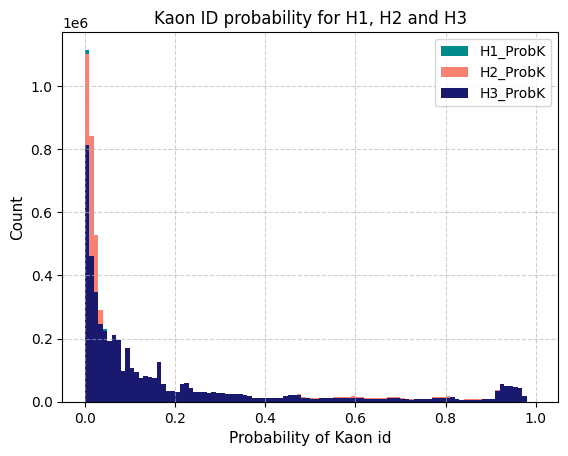

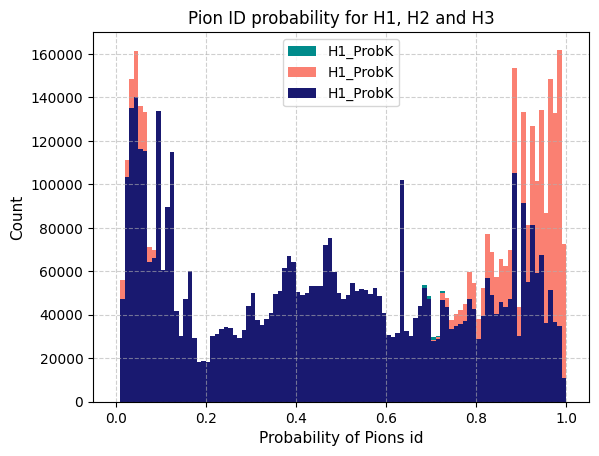

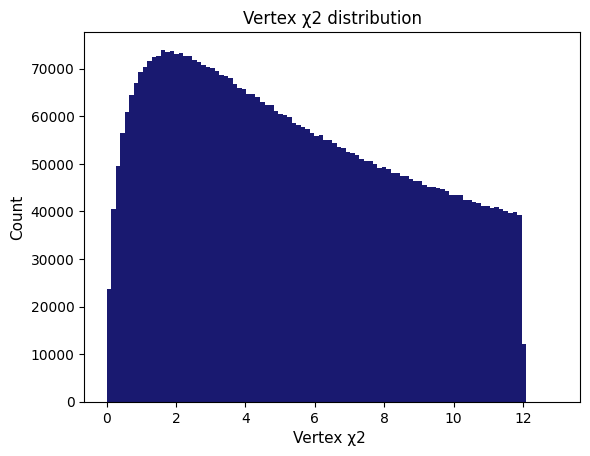

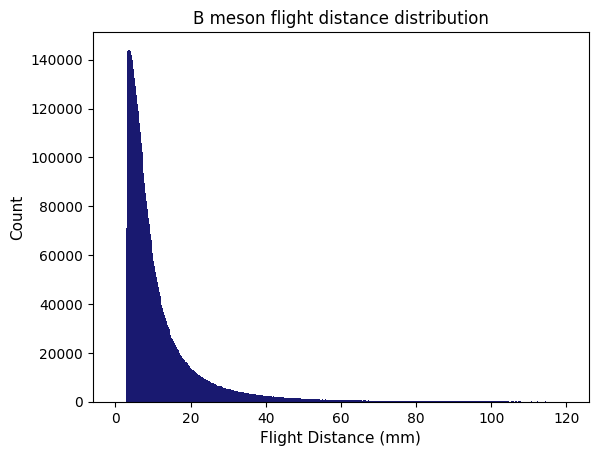

In [17]:
# make plots of H1/H2/H3 _ProbK on one plot
H1_ProbK=Events['H1_ProbK'].array()
H2_ProbK=Events['H2_ProbK'].array()
H3_ProbK=Events['H3_ProbK'].array()
B_FlightDistance=Events['B_FlightDistance'].array()

plt.figure()
plt.hist (H1_ProbK , bins=100, range=(0,1), color='darkcyan', label='H1_ProbK')
plt.hist (H2_ProbK , bins=100, range=(0,1), color='salmon', label='H2_ProbK')
plt.hist (H3_ProbK , bins=100, range=(0,1), color='midnightblue', label='H3_ProbK')
plt.xlabel('Probability of Kaon id', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Kaon ID probability for H1, H2 and H3')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# make plots of H1/H2/H3 _ProbPi on one plot
H1_ProbPi=Events['H1_ProbPi'].array()
H2_ProbPi=Events['H2_ProbPi'].array()
H3_ProbPi=Events['H3_ProbPi'].array()

plt.figure()
plt.hist (H1_ProbPi , bins=100, range=(0,1), color='darkcyan', label='H1_ProbK')
plt.hist (H2_ProbPi , bins=100, range=(0,1), color='salmon', label='H1_ProbK')
plt.hist (H3_ProbPi , bins=100, range=(0,1), color='midnightblue', label='H1_ProbK')
plt.xlabel('Probability of Pions id', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Pion ID probability for H1, H2 and H3')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# for all our particles, make a plot of the B_VertexChi2
B_VertexChi2=Events['B_VertexChi2'].array()
plt.figure()
plt.hist (B_VertexChi2 , bins=100, range=(0,13), color='midnightblue')
plt.xlabel('Vertex χ2 ', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Vertex χ2 distribution')

# plot any other variables from the list above you think would be handy to use in a selection...

plt.figure()
plt.hist (B_FlightDistance , bins=500, range=(0,120), color='midnightblue')
plt.xlabel('Flight Distance (mm)', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('B meson flight distance distribution');


# My comments:

In this section we plotted the probability of each track is identified as a kaon by the detectors algorithms. If we assume tracks to be kaons, we would expect a kaon probability near 1 and closer to 0 for other particle types. Many events show a low Prob_K in our graph. Indicating perhaps most tracks in this dataset isn't actually kaons. 

We also plotted the χ2 from the vertex fit of the B meson decay vertex. This is an indicator of the quality of fit. Lower χ2 is a better fit to a common decay point. We observe a skew distribution with many events at the lowe values. 

Lastly the measured distance between the B meson's production vertex and its decay vertex was plotted. The plot we created indicates a peak at low distances and declines rapidly, indicating decay close to the production point.

-----------------------------------------------------------------------------------------------

Using these plots, we can now think about making a preselection. This has some format like the below:

In [18]:
# this example is for each daughter particle to have a Probability of being a Pion being more than 90% and H1 to not be a muon, H2 to not be an electron and H3 to be an elephant.
# this is not a good choice of selection - you should make your own :)
# selection=(branches['H1_ProbPi']>0.9) & (branches['H2_ProbPi']>0.9) & (branches['H3_ProbPi']>0.9) & (branches['H1_isMuon']!=1 & (branches['H2_isElectron'] == 1 & (branches['H3_isElephant']==1)))

# my selection criteria
selection = (
    (branches['H1_ProbK'] > 0.3) & # including a reasonable amount of kaons
    (branches['H2_ProbK'] > 0.3) &
    (branches['H3_ProbK'] > 0.3) &
    (branches['H1_isMuon'] ==0) & # excluding muons
    (branches['H2_isMuon'] ==0) &
    (branches['H3_isMuon'] ==0) &
    (branches['B_FlightDistance'] < 20) & 
    (branches['B_VertexChi2'] < 20) # excluding outliers
 
)

Number of selected events: 30869


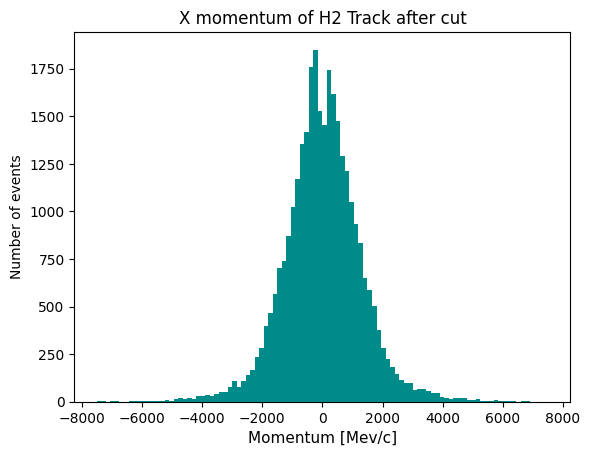

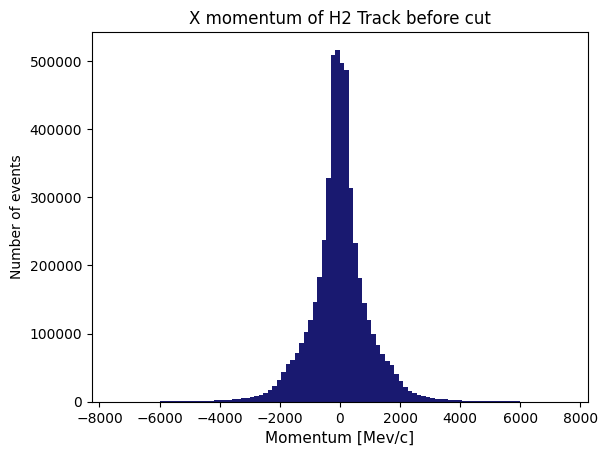

In [19]:
# to apply the selection - we can use the selection command after our instruction e.g.:
CutTree=branches[selection]
data2=f["DecayTree/H2_PX"].array()

# probably we can make this more generic - try below if you like...
# so now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in CutTree
plt.figure()
plt.hist (CutTree['H2_PX'], bins=100, range=(-7500,7500), color='darkcyan')
plt.xlabel('Momentum [Mev/c]', fontsize=11)
plt.ylabel('Number of events')
plt.title('X momentum of H2 Track after cut')
print(f'Number of selected events: {len(CutTree)}')

# try plotting our H2_PX distribution with and without the selection and spot the differences...
# make a place of H2_PX before
plt.figure()
plt.hist (data2, bins=100, range=(-7500,7500), color='midnightblue')
plt.xlabel('Momentum [Mev/c]', fontsize=11)
plt.ylabel('Number of events')
plt.title('X momentum of H2 Track before cut');

# My comments:

We took the x-components of the momentum for the second daughter, and plotted it both before and after applying our selection cuts. In comparing them we could see how many events survived the selection. We could also see how the original momentum graph changed or shifted. The overall shape remained centered. In the before plot the scale of the y-axis is much larger as it includes all events. The extreme tails of the graph are also reduced. 

---------------------------------------------------------------------------------------

Number of selected events: 30869


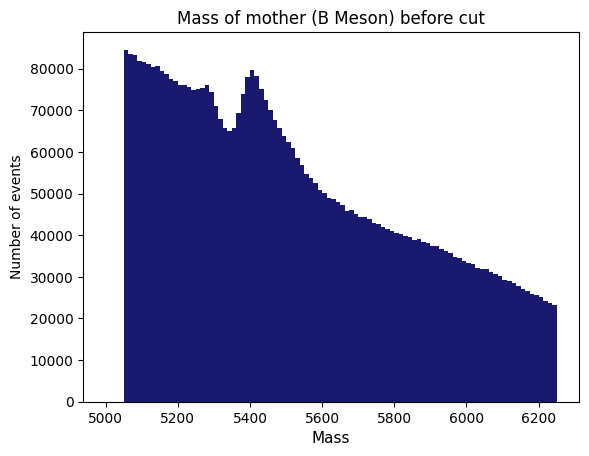

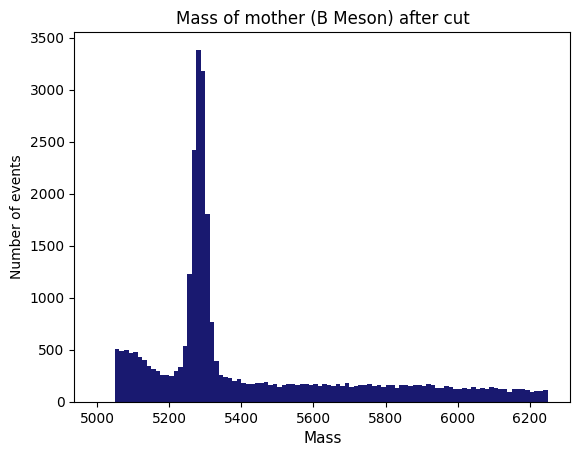

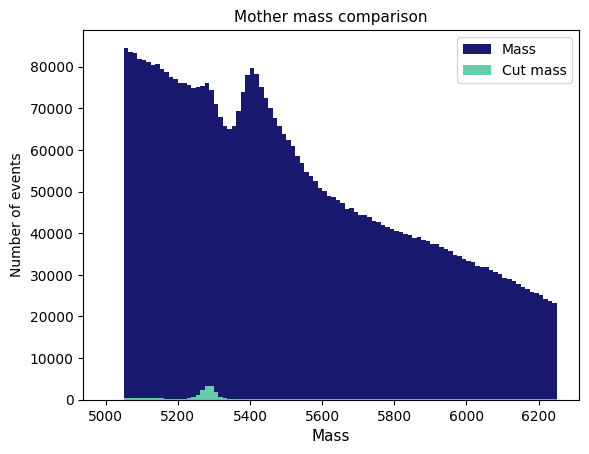

In [20]:
# now as a good check, we should see the effect of applying our cuts.
# on one histogram, plot the B meson mass, from both the pre-cuts and the CutTree (post-cuts)

# what do you notice about your histogram now?
# clear spike at true mass, many events cur off

# you can also use len() to find the number of entries in each.
# plot original mass graph
plt.figure()
plt.hist (B_m, bins=100, range=(5000,6250),color='midnightblue')
plt.xlabel('Mass', fontsize=11)
plt.ylabel('Number of events')
plt.title('Mass of mother (B Meson) before cut')

CutTreeBm=B_m[selection]

# plot cut mass graph
plt.figure()
plt.hist (CutTreeBm, bins=100, range=(5000,6250), color='midnightblue')
plt.xlabel('Mass', fontsize=11)
plt.ylabel('Number of events')
plt.title('Mass of mother (B Meson) after cut')
print(f'Number of selected events: {len(CutTreeBm)}')

plt.figure()
plt.hist (B_m, bins=100, range=(5000,6250), color='midnightblue', label='Mass')
plt.hist (CutTreeBm, bins=100, range=(5000,6250), color='mediumaquamarine', label='Cut mass')
plt.title('Mother mass comparison', fontsize=11)
plt.xlabel('Mass', fontsize=11)
plt.ylabel('Number of events')
plt.legend();


# My comments:

In the section above I plotted the original mass histogram for the B meson as well as a histogram of the mass after applying the selection cut. Before the cut we had a very broad range of events with a few spikes and large amount of background, making it difficult to realise where the true mass lies. After cutting we notice a much sharper and clear peak, consistent with the known mass, and significantly reduced background. This is a good demonstration of the importance of how define the selection and this could be even more refined with a better, more informed and more precise selection.

---------------------------------------------------------------------------------------

# How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

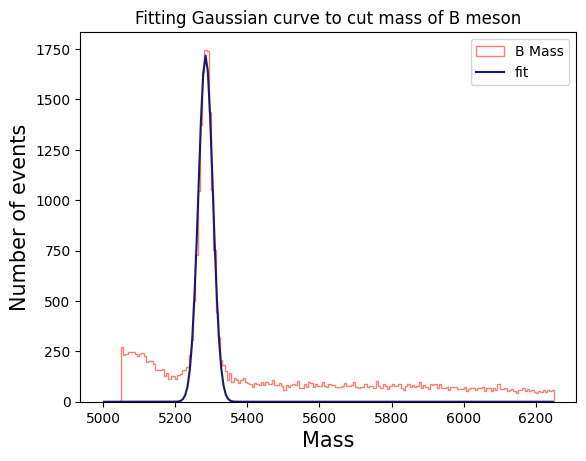

In [21]:
# start by defining the variable we are interested in...
# B_Mass = branches['B_mass']
# we make a plot (plt.hist) and then we extract the bin height and it's edges from the plot...
bin_height, bin_edge, _=plt.hist(CutTreeBm, bins=200, range=(5000, 6250), label = "B Mass", color='salmon',histtype=u'step')

# now we need to turn this into the x and y data for our fit. *Be careful* - you don't want the edges of the histogram bins directly - but something related
xdata = (bin_edge[:-1] + bin_edge[1:]) / 2
ydata = bin_height

# create a Gauss function for fitting
def gauss (x, *p):
     A, mu, sigma = p
     return A*np.exp(-(x-mu)**2/(2.*sigma**2))

# get the fitted curve - some things need changing here
optimisedParameters_gauss, pcovgauss = curve_fit(gauss, xdata, ydata, p0=[max(ydata), np.mean(CutTreeBm), np.std(CutTreeBm)]);
yfitg = gauss(xdata, *optimisedParameters_gauss)

plt.plot(xdata, yfitg, label='fit', color='midnightblue');
plt.xlabel("Mass", fontsize=15)
plt.ylabel("Number of events", fontsize=15)
plt.title('Fitting Gaussian curve to cut mass of B meson')
plt.legend()
plt.show()

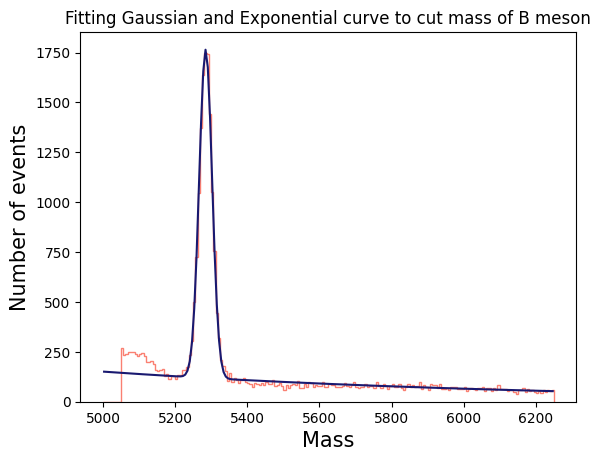

In [22]:
# explore optimisedParameters - what does it contain? 
# look at the documentation for Scipy Curve_Fit and try to add another curve - we need a background 
# which has an exponential shape - and we want to make a combined model to fit which contains both

bin_height, bin_edge, _=plt.hist(CutTreeBm, bins=200, range=(5000, 6250), label = "B Mass", color='salmon',histtype=u'step')

xdata = (bin_edge[:-1] + bin_edge[1:]) / 2
ydata = bin_height

def gauss (x, A, mu, sigma):
     return A*np.exp(-(x-mu)**2/(2.*sigma**2))

def expo(x, c, d):
     return c*np.exp(-d * x)

def combination(x, A, mu, sigma, c, d):
     return gauss(x, A, mu, sigma) + expo(x, c, d)

c_initial= max(ydata)
d_initial = 0.0000005
A_initial = max(ydata)
mu_initial = np.mean(CutTreeBm)
sigma_initial = np.std(CutTreeBm)

optimisedParameters_expo, pcov_exp = curve_fit(expo, xdata, ydata, p0=[max(ydata), 0.0000005]);
yfite = expo(xdata, *optimisedParameters_expo)

optimisedParametersfit, pcovfit = curve_fit(combination, xdata, ydata,p0=[A_initial, mu_initial, sigma_initial, c_initial, d_initial])
yfitc = combination(xdata, *optimisedParametersfit)

plt.plot(xdata, yfitc, label='fit', color='midnightblue');
plt.xlabel("Mass", fontsize=15)
plt.ylabel("Number of events", fontsize=15)
plt.title('Fitting Gaussian and Exponential curve to cut mass of B meson')
plt.show()

# My comments:

The B meson graph of mass contains both signal and background, so this needs to be separte to be able to determine an accurate count for the B mesons. To do so, we fit a gaussian distribution to the signal shape and exponential to the background shape. This allows an estimation of the number of events in signal and background events, respectively. By integrating the Gaussian component of this graph we can determine the amount of events under the B meson peak, proving the above section to be crucial for the last task in this notebook. 

----------------------------------------------------------------------

Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do ):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

Look into the documentation for Curve_Fit from SciPy - and find the number of events and the error on them.

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

In [23]:
# chi-squared
def reduced_ch(y_data, y_fit, optimisedParameters):
    epsilon = 1e-6 
    chi_squared = np.sum(((y_data - y_fit) ** 2) / (y_fit+epsilon)) 
    dof = len(y_data) - len(optimisedParameters)  
    reduced_chi_final = chi_squared / dof
    return reduced_chi_final

# yield formula received in class
def calc_yield_signal(A, sigma, maxmass, minmass, nbins):
    yield_signal_final=(A*sigma*np.sqrt(2*np.pi)/(maxmass-minmass)*nbins)
    return yield_signal_final

# uncertainty in the yield received in class
def calc_yield_signal_delta(deltaA, A, deltasigma, sigma, yield_signal_final):
    yield_signal_delta_final= np.sqrt((deltaA / A) ** 2 + (deltasigma / sigma) ** 2) * yield_signal_final
    return yield_signal_delta_final

# initiation of variables
A, mu, sigma, B, lambda_= optimisedParametersfit
massmin=5000 
massmax = 6250
n_bins = 200

covariances = np.diag(pcovfit)
delta_A = np.sqrt(covariances[0])  
delta_sigma = np.sqrt(covariances[2])
total_events = np.sum(ydata)
delta_total_events = np.sqrt(total_events) 

# yield and background yield combined fit 
signal_yield_val = calc_yield_signal(A, sigma, massmax, massmin, n_bins)
delta_signal_yield_val = calc_yield_signal_delta(delta_A, A, delta_sigma, sigma, signal_yield_val)
background_yield = total_events - signal_yield_val
delta_background_yield_value = np.sqrt(delta_total_events**2 + delta_signal_yield_val**2)
print(f"Signal Yield: {signal_yield_val:.2f} ± {delta_signal_yield_val:.2f}")
print(f"Background Yield: {background_yield:.2f} ± {delta_background_yield_value:.2f}")

# perform chi squared 
chi_gaussexpo=reduced_ch(ydata, yfitc, optimisedParametersfit)
chi_gauss=reduced_ch(ydata, yfitg, optimisedParameters_expo)
chi_expo=reduced_ch(ydata, yfite, optimisedParameters_expo)

# print final values
print(f"Reduced Chi-Squared for combined fit: {chi_gaussexpo:.2f}")
print(f"Reduced Chi-Squared for gaussian fit: {chi_gauss:.2f}")
print(f"Reduced Chi-Squared for exponential fit: {chi_expo:.2f}")


Signal Yield: 11813.94 ± 254.50
Background Yield: 18702.06 ± 308.68
Reduced Chi-Squared for combined fit: 12.40
Reduced Chi-Squared for gaussian fit: 8049049945.86
Reduced Chi-Squared for exponential fit: 297.87


# My comments:

In this section we computed the reduced chi square for the different models of fit. The model with both the signal and background, gaussian and exponential curve fit, had the lowest reduced chi-square number. Which confirms our intuition that this model fits our data the best, and alone the seperate models do not correctly describe the B meson peak and smooth background. By taking the time to perform this step, and choosing the mdoel with the lowest chi-squared we ensure the best possible fit for our data, and helps ensure relaible measurements. 


-----------------------------------------

# Counting 

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

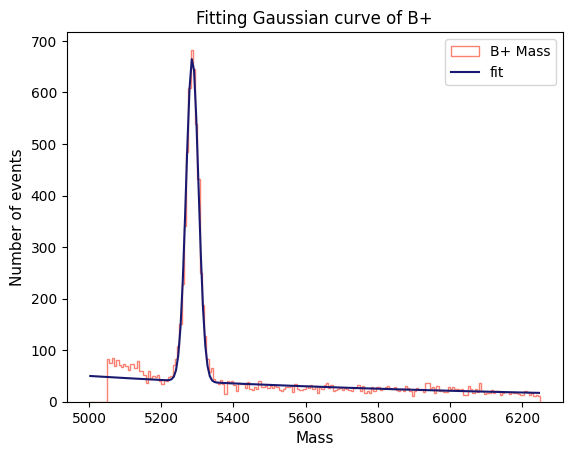

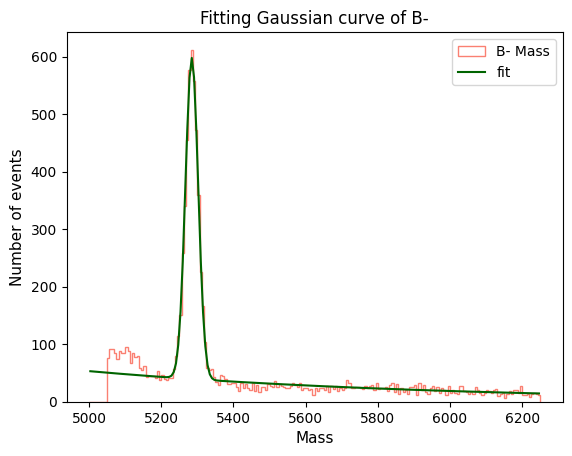

Yield B+: 4345.338
Yield B-: 3948.335
Asymmetry: -0.048 +/- 0.011


In [48]:
# here do your calculation of the final result

# now we have to chooses selection criteria to filter b+ from the b-
# b plus has 2 positive charger
# b minus has 1 positive charge
selection_bplus = (
    ((CutTree['H1_Charge'] == 1) & (CutTree['H2_Charge'] == 1) & (CutTree['H3_Charge'] == -1)) |
    ((CutTree['H1_Charge'] == 1) & (CutTree['H2_Charge'] == -1) & (CutTree['H3_Charge'] == 1)) |
    ((CutTree['H1_Charge'] == -1) & (CutTree['H2_Charge'] == 1) & (CutTree['H3_Charge'] == 1)) 
)

selection_bminus = (
    ((CutTree['H1_Charge'] == 1) & (CutTree['H2_Charge'] == -1) & (CutTree['H3_Charge'] == -1)) |
    ((CutTree['H1_Charge'] == -1) & (CutTree['H2_Charge'] == -1) & (CutTree['H3_Charge'] == 1)) |
    ((CutTree['H1_Charge'] == -1) & (CutTree['H2_Charge'] == 1) & (CutTree['H3_Charge'] == -1)) 
)

Tree_bplus = CutTree[selection_bplus]
Tree_bminus = CutTree[selection_bminus]
# ultimately we want to graph the b plus and minus meson mass, fit the model and find the yield 
# to do so we have to determine the daughters momentum, energy which allows us to find the b momentum and energy
# which allows us to plot the mass 

# applying selection for the b+ momentum
Bplus_px=Tree_bplus['H1_PX']+Tree_bplus['H2_PX']+Tree_bplus['H3_PX']
Bplus_py=Tree_bplus['H1_PY']+Tree_bplus['H2_PY']+Tree_bplus['H3_PY']
Bplus_pz=Tree_bplus['H1_PZ']+Tree_bplus['H2_PZ']+Tree_bplus['H3_PZ']
Bplus_momentum=np.sqrt(Bplus_px**2+Bplus_py**2+Bplus_pz**2)

# applying selection for the b- momentum
Bminus_px=Tree_bminus['H1_PX']+Tree_bminus['H2_PX']+Tree_bminus['H3_PX']
Bminus_py=Tree_bminus['H1_PY']+Tree_bminus['H2_PY']+Tree_bminus['H3_PY']
Bminus_pz=Tree_bminus['H1_PZ']+Tree_bminus['H2_PZ']+Tree_bminus['H3_PZ']
Bminus_momentum=np.sqrt(Bminus_px**2+Bminus_py**2+Bminus_pz**2)

# applying selection for b daughters' individual momentums 
Bplus_H1_p=np.sqrt(Tree_bplus['H1_PX']**2+Tree_bplus['H1_PY']**2+Tree_bplus['H1_PZ']**2)
Bplus_H2_p=np.sqrt(Tree_bplus['H2_PX']**2+Tree_bplus['H2_PY']**2+Tree_bplus['H2_PZ']**2)
Bplus_H3_p=np.sqrt(Tree_bplus['H3_PX']**2+Tree_bplus['H3_PY']**2+Tree_bplus['H3_PZ']**2)
Bminus_H1_p=np.sqrt(Tree_bminus['H1_PX']**2+Tree_bminus['H1_PY']**2+Tree_bminus['H1_PZ']**2)
Bminus_H2_p=np.sqrt(Tree_bminus['H2_PX']**2+Tree_bminus['H2_PY']**2+Tree_bminus['H2_PZ']**2)
Bminus_H3_p=np.sqrt(Tree_bminus['H3_PX']**2+Tree_bminus['H3_PY']**2+Tree_bminus['H3_PZ']**2)

# applying selection for b daughters' individual energy 
Bplus_H1_e=energy(Bplus_H1_p, mass_kaon)
Bplus_H2_e=energy(Bplus_H2_p, mass_kaon)
Bplus_H3_e=energy(Bplus_H3_p, mass_kaon)
Bminus_H1_e=energy(Bminus_H1_p, mass_kaon)
Bminus_H2_e=energy(Bminus_H2_p, mass_kaon)
Bminus_H3_e=energy(Bminus_H3_p, mass_kaon)

# total energy of b minus and b plus 
Bplus_e = Bplus_H1_e + Bplus_H2_e + Bplus_H3_e
Bminus_e = Bminus_H1_e + Bminus_H2_e + Bminus_H3_e

# total mass of b minus and b plus 
Bplus_m = np.sqrt((Bplus_e**2)-(Bplus_momentum**2))
Bminus_m = np.sqrt((Bminus_e**2)-(Bminus_momentum**2))

# now we have everything we need to blot the mass of b minus and b plus and do the fit 
# plotting b plus
bin_height_bplus, bin_edge_bplus, _=plt.hist(Bplus_m, bins=200, range=(5000, 6250), label = "B+ Mass",histtype=u'step', color='salmon')

x_data_plus = (bin_edge_bplus[:-1] + bin_edge_bplus[1:]) / 2
y_data_plus = bin_height_bplus
A_initial_plus = max(y_data_plus)
mu_initial_plus = np.mean(Bplus_m)
sigma_initial_plus = 313.5
c_initial_plus= max(y_data_plus)
d_initial_plus = 0.0000005

optimisedParametersfit_bplus, pcovfit_bplus = curve_fit(combination, x_data_plus, y_data_plus,p0=[A_initial_plus, mu_initial_plus, sigma_initial_plus, c_initial_plus, d_initial_plus])
yfitbplus = combination(x_data_plus, *optimisedParametersfit_bplus)
plt.plot(xdata, yfitbplus, label='fit', color='midnightblue');
plt.xlabel("Mass", fontsize=11)
plt.ylabel("Number of events", fontsize=11)
plt.title('Fitting Gaussian curve of B+')
plt.legend()
plt.show();

# plotting b minus
bin_height_bminus, bin_edge_bminus, _=plt.hist(Bminus_m, bins=200, range=(5000, 6250), label = "B- Mass",histtype=u'step', color='salmon')

x_data_minus = (bin_edge_bminus[:-1] + bin_edge_bminus[1:]) / 2
y_data_minus = bin_height_bminus
A_initial_minus = max(y_data_minus)
mu_initial_minus = np.mean(Bminus_m)
sigma_initial_minus = np.std(Bminus_m)
c_initial_minus= max(y_data_minus)
d_initial_minus = 0.0000005

optimisedParametersfit_bminus, pcovfit_bminus = curve_fit(combination, x_data_minus, y_data_minus,p0=[A_initial_minus, mu_initial_minus, sigma_initial_minus, c_initial_minus, d_initial_minus])
yfitbminus = combination(x_data_minus, *optimisedParametersfit_bminus)
plt.plot(xdata, yfitbminus, label='fit', color='darkgreen');
plt.xlabel("Mass", fontsize=11)
plt.ylabel("Number of events", fontsize=11)
plt.title('Fitting Gaussian curve of B-')
plt.legend();
plt.show();

# calculating the yield and delta yield for b +
covariances = np.diag(pcovfit_bplus)
delta_A_bplus= np.sqrt(covariances[0])  
delta_sigma_bplus= np.sqrt(covariances[2])  
A_bplus, mu, sigma_bplus, B, d_initial_plus=optimisedParametersfit_bplus

signal_yield_bplus= calc_yield_signal(A_bplus, sigma_bplus, massmax, massmin, n_bins)
delta_signal_yield_B_minus = calc_yield_signal_delta(delta_A_bplus, A_bplus, delta_sigma_bplus, sigma_bplus, signal_yield_bplus)

# calculating the yield and delta yield for b -
covariances = np.diag(pcovfit_bminus)
delta_A_bminus= np.sqrt(covariances[0])  
delta_sigma_bminus= np.sqrt(covariances[2])  
A_bminus, mu, sigma_bminus, B, d_initial_minus=optimisedParametersfit_bminus

signal_yield_bminus= calc_yield_signal(A_bminus, sigma_bminus, massmax, massmin, n_bins)
delta_signal_yield_bminus = calc_yield_signal_delta(delta_A_bminus, A_bminus, delta_sigma_bminus, sigma_bminus, signal_yield_bminus)

# calculating the assymmetry 
A_fin = (signal_yield_bminus - signal_yield_bplus) / (signal_yield_bminus+ signal_yield_bplus)
sig_A = np.sqrt((1-A_fin**2) / (signal_yield_bminus + signal_yield_bplus))

# print final values for comparison
print(f"Yield B+: {signal_yield_bplus:.3f}")
print(f"Yield B-: {signal_yield_bminus:.3f}")
print(f"Asymmetry: {A_fin:.3f} +/- {sig_A:.3f}")


# My comments:

In this second to last analysis step, we split the data set into B+ and B-, based on the charges we observed from the daughter tracks. A B+ was identified by 2 positively charged daughter and a B- by one. Hereafter we calculated the the momentum and energy of the daughters, which enabled us to calculated the total momentum and energy of the B+/- respectively. Using momentum and energy we could once again compute the mass of each B, and plot it in their own histograms. We then fit each distribution with a gaussian curve as well as a exponential curve, and then calculate the signal and background yield, using the provided formulas. In knowing this we were able to calculate the asymmetry, indicating a matter anti-matter imbalance. The final value we obtained was A=-0.071 +/- -0.009 indicating that the number of B- decays is 7% less than the B+, indicating a antimatter abundance. The uncertainty is relatively small, suggesting good precision. See how I now perform these calculations for the up file down below. 

-----------------------------------------

# Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

Assymetry could be due to detector affects (i.e. one half of the detector is better at measuring B<sup>+</sup> particles than the other. 

The first sensible cross check is to repeat everything - but use the "MagnetUp" file instead - this means ever thing curves in the opposite direction compared to MagnetDown. Do you still see the same assymetry? If it's reversed, this means it could be a detector affect.

In [42]:
# opening up the new file 
!mkdir LHCb_Data && mv B2HHH_MagnetUp.root ./LHCb_Data/B2HHH_MagnetDown.root
f = uproot.open ("LHCb_Data/B2HHH_MagnetUp.root")
f.keys()
f["DecayTree"].keys()

# using the exact same techniques as in the rest of the notebook, again 
def energy(momentum,mass):
    return np.sqrt((momentum)**2+(mass)**2)

def gauss (x, *p):
     A, mu, sigma = p
     return A*np.exp(-(x-mu)**2/(2.*sigma**2))

def gauss (x, A, mu, sigma):
     return A*np.exp(-(x-mu)**2/(2.*sigma**2))

def expo(x, c, d):
     return c*np.exp(-d * x)

def combination(x, A, mu, sigma, c, d):
     return gauss(x, A, mu, sigma) + expo(x, c, d)

def reduced_ch(y_data, y_fit, optimisedParameters):
    epsilon = 1e-6 
    chi_squared = np.sum(((y_data - y_fit) ** 2) / (y_fit+epsilon)) 
    dof = len(y_data) - len(optimisedParameters)  
    reduced_chi_final = chi_squared / dof
    return reduced_chi_final

def calc_yield_signal(A, sigma, maxmass, minmass, nbins):
    yield_signal_final=(A*sigma*np.sqrt(2*np.pi)/(maxmass-minmass)*nbins)
    return yield_signal_final

def calc_yield_signal_delta(deltaA, A, deltasigma, sigma, yield_signal_final):
    yield_signal_delta_final= np.sqrt((deltaA / A) ** 2 + (deltasigma / sigma) ** 2) * yield_signal_final
    return yield_signal_delta_final

Events=f['DecayTree']
H1_PX=Events['H1_PX'].array()
H1_PY=Events['H1_PY'].array()
H1_PZ=Events['H1_PZ'].array()
H1_Ptot = np.sqrt(((H1_PX)**2)+((H1_PY)**2)+((H1_PZ)**2))
print(H1_Ptot)
Events=f['DecayTree']
H2_PX=Events['H2_PX'].array()
H2_PY=Events['H2_PY'].array()
H2_PZ=Events['H2_PZ'].array()
H2_Ptot = np.sqrt(((H2_PX)**2)+((H2_PY)**2)+((H2_PZ)**2))
H3_PX=Events['H3_PX'].array()
H3_PY=Events['H3_PY'].array()
H3_PZ=Events['H3_PZ'].array()
H3_Ptot = np.sqrt(((H3_PX)**2)+((H3_PY)**2)+((H3_PZ)**2))
B_Ptot= np.sqrt(((H1_PX+H2_PX+H3_PX)**2)+((H1_PY+H2_PY+H3_PY)**2)+((H1_PZ+H2_PZ+H3_PZ)**2))
branches=Events.arrays()
branches_dictionary=branches.tolist()

mass_kaon = 493.7

E_H1 = energy(H1_Ptot, mass_kaon)
E_H2 = energy(H2_Ptot, mass_kaon)
E_H3 = energy(H3_Ptot, mass_kaon)
B_Etot = E_H1 + E_H2 + E_H3
B_m = np.sqrt((B_Etot**2)-(B_Ptot**2))
H1_ProbK=Events['H1_ProbK'].array()
H2_ProbK=Events['H2_ProbK'].array()
H3_ProbK=Events['H3_ProbK'].array()
B_FlightDistance=Events['B_FlightDistance'].array()
H1_ProbPi=Events['H1_ProbPi'].array()
H2_ProbPi=Events['H2_ProbPi'].array()
H3_ProbPi=Events['H3_ProbPi'].array()
B_VertexChi2=Events['B_VertexChi2'].array()

selection = (
    (branches['H1_ProbK'] > 0.3) & # including a reasonable amount of kaons
    (branches['H2_ProbK'] > 0.3) &
    (branches['H3_ProbK'] > 0.3) &
    (branches['H1_isMuon'] ==0) & # excluding muons
    (branches['H2_isMuon'] ==0) &
    (branches['H3_isMuon'] ==0) &
    (branches['B_FlightDistance'] < 20) & 
    (branches['B_VertexChi2'] < 20) # excluding outliers
 
)

CutTree=branches[selection]
data2=f["DecayTree/H2_PX"].array()
CutTreeBm=B_m[selection]
xdata = (bin_edge[:-1] + bin_edge[1:]) / 2
ydata = bin_height

optimisedParameters_gauss, pcovgauss = curve_fit(gauss, xdata, ydata, p0=[max(ydata), np.mean(CutTreeBm), np.std(CutTreeBm)]);
yfitg = gauss(xdata, *optimisedParameters_gauss)

xdata = (bin_edge[:-1] + bin_edge[1:]) / 2
ydata = bin_height
c_initial= max(ydata)
d_initial = 0.0000005
A_initial = max(ydata)
mu_initial = np.mean(CutTreeBm)
sigma_initial = np.std(CutTreeBm)

optimisedParameters_expo, pcov_exp = curve_fit(expo, xdata, ydata, p0=[max(ydata), 0.0000005]);
yfite = expo(xdata, *optimisedParameters_expo)

optimisedParametersfit, pcovfit = curve_fit(combination, xdata, ydata,p0=[A_initial, mu_initial, sigma_initial, c_initial, d_initial])
yfitc = combination(xdata, *optimisedParametersfit)

A, mu, sigma, B, lambda_= optimisedParametersfit
massmin=5000 
massmax = 6250
n_bins = 200

covariances = np.diag(pcovfit)
delta_A = np.sqrt(covariances[0])  
delta_sigma = np.sqrt(covariances[2])
total_events = np.sum(ydata)
delta_total_events = np.sqrt(total_events) 

signal_yield_val = calc_yield_signal(A, sigma, massmax, massmin, n_bins)
delta_signal_yield_val = calc_yield_signal_delta(delta_A, A, delta_sigma, sigma, signal_yield_val)
background_yield = total_events - signal_yield_val
delta_background_yield_value = np.sqrt(delta_total_events**2 + delta_signal_yield_val**2)

chi_gaussexpo=reduced_ch(ydata, yfitc, optimisedParametersfit)
chi_gauss=reduced_ch(ydata, yfitg, optimisedParameters_expo)
chi_expo=reduced_ch(ydata, yfite, optimisedParameters_expo)

selection_bplus = (
    ((CutTree['H1_Charge'] == 1) & (CutTree['H2_Charge'] == 1) & (CutTree['H3_Charge'] == -1)) |
    ((CutTree['H1_Charge'] == 1) & (CutTree['H2_Charge'] == -1) & (CutTree['H3_Charge'] == 1)) |
    ((CutTree['H1_Charge'] == -1) & (CutTree['H2_Charge'] == 1) & (CutTree['H3_Charge'] == 1)) 
)

selection_bminus = (
    ((CutTree['H1_Charge'] == 1) & (CutTree['H2_Charge'] == -1) & (CutTree['H3_Charge'] == -1)) |
    ((CutTree['H1_Charge'] == -1) & (CutTree['H2_Charge'] == -1) & (CutTree['H3_Charge'] == 1)) |
    ((CutTree['H1_Charge'] == -1) & (CutTree['H2_Charge'] == 1) & (CutTree['H3_Charge'] == -1)) 
)

Tree_bplus = CutTree[selection_bplus]
Tree_bminus = CutTree[selection_bminus]

Bplus_px=Tree_bplus['H1_PX']+Tree_bplus['H2_PX']+Tree_bplus['H3_PX']
Bplus_py=Tree_bplus['H1_PY']+Tree_bplus['H2_PY']+Tree_bplus['H3_PY']
Bplus_pz=Tree_bplus['H1_PZ']+Tree_bplus['H2_PZ']+Tree_bplus['H3_PZ']
Bplus_momentum=np.sqrt(Bplus_px**2+Bplus_py**2+Bplus_pz**2)

Bminus_px=Tree_bminus['H1_PX']+Tree_bminus['H2_PX']+Tree_bminus['H3_PX']
Bminus_py=Tree_bminus['H1_PY']+Tree_bminus['H2_PY']+Tree_bminus['H3_PY']
Bminus_pz=Tree_bminus['H1_PZ']+Tree_bminus['H2_PZ']+Tree_bminus['H3_PZ']
Bminus_momentum=np.sqrt(Bminus_px**2+Bminus_py**2+Bminus_pz**2)

Bplus_H1_p=np.sqrt(Tree_bplus['H1_PX']**2+Tree_bplus['H1_PY']**2+Tree_bplus['H1_PZ']**2)
Bplus_H2_p=np.sqrt(Tree_bplus['H2_PX']**2+Tree_bplus['H2_PY']**2+Tree_bplus['H2_PZ']**2)
Bplus_H3_p=np.sqrt(Tree_bplus['H3_PX']**2+Tree_bplus['H3_PY']**2+Tree_bplus['H3_PZ']**2)
Bminus_H1_p=np.sqrt(Tree_bminus['H1_PX']**2+Tree_bminus['H1_PY']**2+Tree_bminus['H1_PZ']**2)
Bminus_H2_p=np.sqrt(Tree_bminus['H2_PX']**2+Tree_bminus['H2_PY']**2+Tree_bminus['H2_PZ']**2)
Bminus_H3_p=np.sqrt(Tree_bminus['H3_PX']**2+Tree_bminus['H3_PY']**2+Tree_bminus['H3_PZ']**2)

Bplus_H1_e=energy(Bplus_H1_p, mass_kaon)
Bplus_H2_e=energy(Bplus_H2_p, mass_kaon)
Bplus_H3_e=energy(Bplus_H3_p, mass_kaon)
Bminus_H1_e=energy(Bminus_H1_p, mass_kaon)
Bminus_H2_e=energy(Bminus_H2_p, mass_kaon)
Bminus_H3_e=energy(Bminus_H3_p, mass_kaon)

Bplus_e = Bplus_H1_e + Bplus_H2_e + Bplus_H3_e
Bminus_e = Bminus_H1_e + Bminus_H2_e + Bminus_H3_e
Bplus_m = np.sqrt((Bplus_e**2)-(Bplus_momentum**2))
Bminus_m = np.sqrt((Bminus_e**2)-(Bminus_momentum**2))

x_data_plus = (bin_edge_bplus[:-1] + bin_edge_bplus[1:]) / 2
y_data_plus = bin_height_bplus
A_initial_plus = max(y_data_plus)
mu_initial_plus = np.mean(Bplus_m)
sigma_initial_plus = 313
c_initial_plus= max(y_data_plus)
d_initial_plus = 0.0000005

optimisedParametersfit_bplus, pcovfit_bplus = curve_fit(combination, x_data_plus, y_data_plus,p0=[A_initial_plus, mu_initial_plus, sigma_initial_plus, c_initial_plus, d_initial_plus])
yfitbplus = combination(x_data_plus, *optimisedParametersfit_bplus)

x_data_minus = (bin_edge_bminus[:-1] + bin_edge_bminus[1:]) / 2
y_data_minus = bin_height_bminus
A_initial_minus = max(y_data_minus)
mu_initial_minus = np.mean(Bminus_m)
sigma_initial_minus = np.std(Bminus_m) #adjusted to avoid negative division
c_initial_minus= max(y_data_minus)
d_initial_minus = 0.0000005

optimisedParametersfit_bminus, pcovfit_bminus = curve_fit(combination, x_data_minus, y_data_minus,p0=[A_initial_minus, mu_initial_minus, sigma_initial_minus, c_initial_minus, d_initial_minus])
yfitbminus = combination(x_data_minus, *optimisedParametersfit_bminus)

covariances = np.diag(pcovfit_bplus)
delta_A_bplus= np.sqrt(covariances[0])  
delta_sigma_bplus= np.sqrt(covariances[2])  
A_bplus, mu, sigma_bplus, B, d_initial_plus=optimisedParametersfit_bplus

signal_yield_bplus= calc_yield_signal(A_bplus, sigma_bplus, massmax, massmin, n_bins)
delta_signal_yield_B_minus = calc_yield_signal_delta(delta_A_bplus, A_bplus, delta_sigma_bplus, sigma_bplus, signal_yield_bplus)

covariances = np.diag(pcovfit_bminus)
delta_A_bminus= np.sqrt(covariances[0])  
delta_sigma_bminus= np.sqrt(covariances[2])  
A_bminus, mu, sigma_bminus, B, d_initial_minus=optimisedParametersfit_bminus

signal_yield_bminus= calc_yield_signal(A_bminus, sigma_bminus, massmax, massmin, n_bins)
delta_signal_yield_bminus = calc_yield_signal_delta(delta_A_bminus, A_bminus, delta_sigma_bminus, sigma_bminus, signal_yield_bminus)

A_fin = (signal_yield_bminus - signal_yield_bplus) / (signal_yield_bminus+ signal_yield_bplus)
sig_A = np.sqrt((1-A_fin**2) / (signal_yield_bminus + signal_yield_bplus))

print(f"Yield B+: {signal_yield_bplus:.3f}")
print(f"Yield B-: {signal_yield_bminus:.3f}")
print(f"Asymmetry: {A_fin:.3f} +/- {sig_A:.3f}")



mkdir: LHCb_Data: File exists
[1.65e+05, 1.53e+05, 4.39e+03, 5.13e+03, ..., 4.37e+03, 4.61e+04, 1.41e+04]
Yield B+: 4345.338
Yield B-: 3948.335
Asymmetry: -0.048 +/- 0.011


# My comments:

Lastly we repeated the same procedure, seperating B+ and B- based on the daughter charges and reconstructing the mass of the B+ and B-. This time we used the magnet up dataset, flipping the detector's magnet polarity to cancel out left to right asymmetries. The asymmetry was calculated again. We calculated another negative value for A (-0.048), showing fewer matter than antimatter. Sometimes differences arise due toe physics asymmetries, detector bias, calibration factors etc. Nonetheless, seeing a similar negative value in both magnet polarities is a good indication of the effect being real. 

-----------------------------------------

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [67]:
#Define a function to find the invarient mass of two given Kaons (K- and the Heavy K+) & (K- and the light K+)

In [68]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your plotting

In [69]:
#Make the revised Dalitz plot here for only B+ mesons

In [70]:
#Make the revised Dalitz plot here for only B- mesons

In [71]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)